In [41]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split

In [42]:
# reading the csv file
data = pd.read_csv('train_nLPp5K8/train.csv')

In [43]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [44]:
# looking at first five rows of the data
data.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [45]:
# distribution of classes in the dataset
data['class'].value_counts()

1    1026
0     972
Name: class, dtype: int64

In [46]:
# load images and store it in numpy array
from PIL import Image

# empty list to store the images
X = []
# iterating over each image
count = 0
for img_name in data.image_names:
    #count += 1
    # loading the image using its name
    img = plt.imread('train_nLPp5K8/images/' + img_name)
    #print (img.size)
    #print (img.shape)
    
    #width,height,x=img.size
    #rsize = np.resize(img,(100,100,3)) # Use PIL to resize
    #rsizeArr = np.asarray(rsize)
    #print (rsize.shape)
    # saving each image in the list
    #plt.imshow(rsize)
    #plt.show()
    X.append(img)
    #if count == :
        #break
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data['class']

In [47]:
# shape of the image
X.shape

(1998, 224, 224, 3)

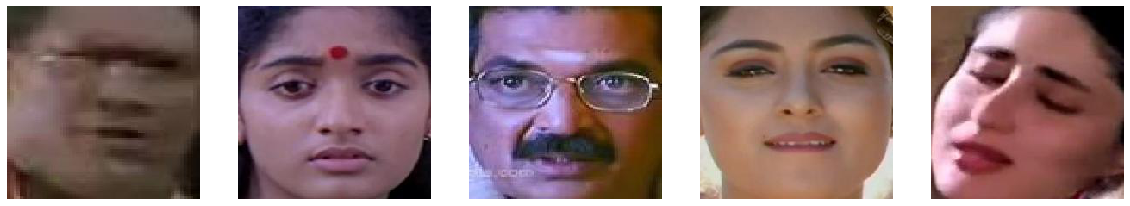

In [48]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

In [49]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(1998, 150528)

In [50]:
# minimum and maximum pixel values of images
X.min(), X.max()

(0, 255)

In [51]:
# normalizing the pixel values
X = X / X.max()

In [52]:
# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

In [53]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [54]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1398, 150528), (1398,)), ((600, 150528), (600,)))

In [55]:
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [56]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [57]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [58]:
# training the model
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
11/11 [==============================] - 2s 223ms/step - loss: 0.8581 - accuracy: 0.5250 - val_loss: 0.6606 - val_accuracy: 0.6700
Epoch 2/50
11/11 [==============================] - 1s 118ms/step - loss: 0.6690 - accuracy: 0.5994 - val_loss: 0.6588 - val_accuracy: 0.5750
Epoch 3/50
11/11 [==============================] - 2s 140ms/step - loss: 0.6443 - accuracy: 0.6123 - val_loss: 0.6561 - val_accuracy: 0.5767
Epoch 4/50
11/11 [==============================] - 2s 205ms/step - loss: 0.6310 - accuracy: 0.6474 - val_loss: 0.6293 - val_accuracy: 0.6417
Epoch 5/50
11/11 [==============================] - 2s 174ms/step - loss: 0.6640 - accuracy: 0.6266 - val_loss: 0.6131 - val_accuracy: 0.6867
Epoch 6/50
11/11 [==============================] - 1s 136ms/step - loss: 0.6051 - accuracy: 0.6817 - val_loss: 0.5949 - val_accuracy: 0.7033
Epoch 7/50
11/11 [==============================] - 2s 178ms/step - loss: 0.5911 - accuracy: 0.6960 - val_loss: 0.6007 - val_accuracy: 0.6850
Epoch 

In [59]:
X_valid

array([[0.11764706, 0.12941176, 0.09411765, ..., 0.50196078, 0.39215686,
        0.34901961],
       [0.3372549 , 0.34117647, 0.31764706, ..., 0.37254902, 0.37647059,
        0.35294118],
       [0.2       , 0.10588235, 0.10588235, ..., 0.21176471, 0.09803922,
        0.11764706],
       ...,
       [0.2       , 0.08627451, 0.02352941, ..., 0.12156863, 0.12941176,
        0.08627451],
       [0.05882353, 0.00392157, 0.00392157, ..., 0.33333333, 0.78823529,
        0.94901961],
       [0.38823529, 0.34901961, 0.30980392, ..., 0.25490196, 0.2       ,
        0.16470588]])

In [60]:
# getting predictions in the form of class as well as probabilities
predictions = model.predict_classes(X_valid)[:, 0]
prediction_probabilities = model.predict(X_valid)[:, 0]

In [61]:
# accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, predictions), '%')

Accuracy on validation set: 0.7616666666666667 %


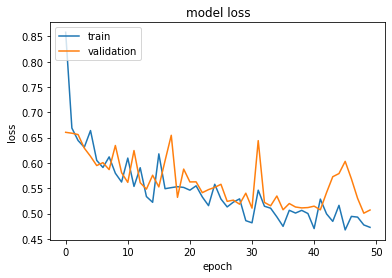

In [62]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

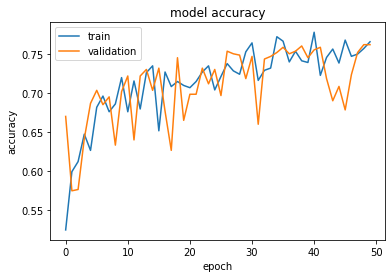

In [63]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [25]:
test_set = pd.read_csv('test_fkwGUNG.csv/')
test_set

,image_names
0,5603.jpg
1,1286.jpg
2,9815.jpg
3,8865.jpg
4,9306.jpg
...,...
5222,13040.jpg
5223,1335.jpg
5224,11246.jpg
5225,9052.jpg


In [36]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in test_set.image_names:
    # loading the image using its name
    img = plt.imread('train_nLPp5K8/images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)



In [37]:
# shape of the image
X.shape

(5227, 224, 224, 3)

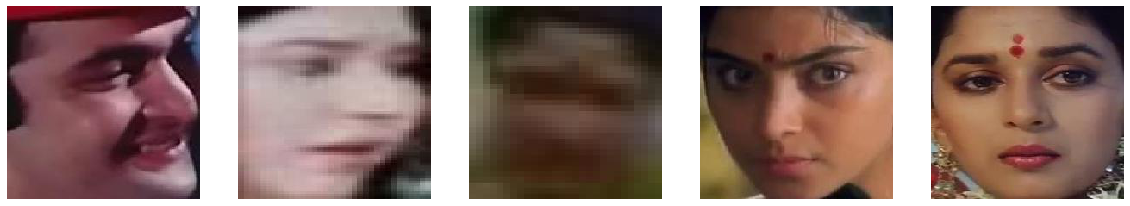

In [38]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

In [39]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(5227, 150528)

In [40]:
# minimum and maximum pixel values of images
X.min(), X.max()

(0, 255)

In [41]:
# normalizing the pixel values
X = X / X.max()

In [42]:
# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

In [49]:
prediction = pd.DataFrame(model.predict_classes(X))
prediction
print (type(prediction))

<class 'pandas.core.frame.DataFrame'>


In [51]:
test_set['class'] = pd.DataFrame(model.predict_classes(X))
test_set

,image_names,class
0,5603.jpg,1
1,1286.jpg,1
2,9815.jpg,0
3,8865.jpg,0
4,9306.jpg,0
...,...,...
5222,13040.jpg,0
5223,1335.jpg,1
5224,11246.jpg,1
5225,9052.jpg,0


In [52]:
test_set.to_csv("output_results.csv",index=False)
